# About

This notebook contain data exploration and visualization part of the project. For other parts of the project, please kindly refer to their respective names.

In [83]:
import pandas as pd

df = pd.read_csv('data/amazon_reviews.csv')
df.head()

,userName,verified,itemName,description,image,brand,feature,category,price,rating,reviewTime,summary,reviewText,vote
0,Amazon Customer,True,"Toblerone Swiss Milk Chocolate Bar, Crunchy Sa...","[""Made from deliciously decadent ingredients, ...",['https://images-na.ssl-images-amazon.com/imag...,Toblerone,[],Prime_Pantry,$1.63,5.0,2018-01-01,Five Stars,super smooth and yummy with crunchy bits,0
1,Carla,True,"Prince of Peace Organic Tea, Oolong, 100 Tea Bags","['Prince of Peace Enterprises, Inc., founded i...",['https://images-na.ssl-images-amazon.com/imag...,Prince Of Peace,[],Grocery_and_Gourmet_Food,$6.40,5.0,2018-01-01,Five Stars,Perfect for kombucha,0
2,Jaclyn,True,"Pet Champion Adjustable No-Pull Harness, Colla...","[""The Pet Champion Large/ Extra Large 22-36 in...",['https://images-na.ssl-images-amazon.com/imag...,Pet Champion,"['Features Bright Pink Lemonade pattern', 'Dua...",Pet_Supplies,$7.99,5.0,2018-01-01,she has an odd shape chest and her pull over h...,Finally a harness that fits my puppy. I really...,0
3,Christinne M,False,Koh-I-Noor Progresso Woodless Colored 24-Penci...,['Koh-I-Noor Progresso Woodless Colored 24-Pen...,['https://images-na.ssl-images-amazon.com/imag...,KOH-I-NOOR,"['Rich, pigmented, solid color encased in lacq...",Arts_Crafts_and_Sewing,$14.18,5.0,2018-01-01,Loving!!,I LOVE THEM!! I bought them at Micheals our of...,0
4,Sandy,True,"Parker Urban Premium Ebony Metal Chiseled, Bal...","[""Stunning craftsmanship based on a classic st...",['https://images-na.ssl-images-amazon.com/imag...,Parker,['Ebony black with metallic highlights and a g...,Office_Products,NaN,5.0,2018-01-01,I love this pen,"I love this pen! I love the shape of it, the f...",0


In [84]:
df.columns

Index(['userName', 'verified', 'itemName', 'description', 'image', 'brand',
       'feature', 'category', 'price', 'rating', 'reviewTime', 'summary',
       'reviewText', 'vote'],
      dtype='object')

In [86]:
# Number of categories
df['category'].nunique()

16

In [87]:
# Review time range
df['reviewTime'] = pd.to_datetime(df['reviewTime'])
df['reviewTime'].min(), df['reviewTime'].max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2018-10-04 00:00:00'))

In [88]:
# Rating distribution by category
df['category'].value_counts()

category
Pet_Supplies                   190347
Grocery_and_Gourmet_Food        99702
Patio_Lawn_and_Garden           64705
Office_Products                 63344
Cell_Phones_and_Accessories     42020
Arts_Crafts_and_Sewing          35502
Musical_Instruments             17609
Prime_Pantry                    15490
Video_Games                     12637
Industrial_and_Scientific        6151
Luxury_Beauty                    2060
AMAZON_FASHION                    556
All_Beauty                        499
Software                          259
Appliances                        209
Digital_Music                      69
Name: count, dtype: int64

In [89]:
df.isnull().sum()

userName         133
verified           0
itemName           1
description        8
image              0
brand           3872
feature            0
category           0
price          74334
rating             0
reviewTime         0
summary          243
reviewText       428
vote               0
dtype: int64

In [90]:
df.shape

(551159, 14)

In [91]:
df['category'].unique()

array(['Prime_Pantry', 'Grocery_and_Gourmet_Food', 'Pet_Supplies',
       'Arts_Crafts_and_Sewing', 'Office_Products',
       'Cell_Phones_and_Accessories', 'Video_Games',
       'Patio_Lawn_and_Garden', 'Software', 'Musical_Instruments',
       'Industrial_and_Scientific', 'Luxury_Beauty', 'All_Beauty',
       'AMAZON_FASHION', 'Digital_Music', 'Appliances'], dtype=object)

In [92]:
# Price statistics by category (cont.)
dfs = {}
for category in df['category'].unique():
    dfs[category] = df[df['category'] == category].copy()

dfs['Prime_Pantry'].head()

,userName,verified,itemName,description,image,brand,feature,category,price,rating,reviewTime,summary,reviewText,vote
0,Amazon Customer,True,"Toblerone Swiss Milk Chocolate Bar, Crunchy Sa...","[""Made from deliciously decadent ingredients, ...",['https://images-na.ssl-images-amazon.com/imag...,Toblerone,[],Prime_Pantry,$1.63,5.0,2018-01-01,Five Stars,super smooth and yummy with crunchy bits,0
61,Dina A. Sollosi,True,Frito-Lay Doritos &amp; Cheetos Mix Orange Var...,"['When it comes to grocery shopping, getting s...",['https://images-na.ssl-images-amazon.com/imag...,Frito Lay,"['<span class=""a-size-base a-color-secondary"">...",Prime_Pantry,$6.98,5.0,2018-01-01,Nice snack,Great for my sons dorm room,0
104,Sby,True,"Quaker Oatmeal Squares Cereal, 14.5 Oz Box",['Quaker Brown Sugar Oatmeal Squares deliver 4...,['https://images-na.ssl-images-amazon.com/imag...,Quaker,[],Prime_Pantry,$2.99,4.0,2018-01-01,Four Stars,good,0
135,Julie,False,Burt's Bees Facial Cleansing Towelettes for Se...,"[""Leave your face feeling clean and moisturize...",['https://images-na.ssl-images-amazon.com/imag...,Burt's Bees Baby,"['<span class=""a-size-base a-color-secondary"">...",Prime_Pantry,$4.97,5.0,2018-01-01,I have really sensitive skin and I find these ...,I have really sensitive skin and I find these ...,0
378,Deanna Lancaster,True,"Blue Diamond Almonds Nut Thins Cracker Crisps,...","[""Nut Thins are a crunchy cracker made with nu...",['https://images-na.ssl-images-amazon.com/imag...,Blue Diamond Almonds,[],Prime_Pantry,$2.79,5.0,2018-01-01,These are my favorite crackers at the moment,These are my favorite crackers at the moment.....,0


In [93]:
# Price statistics by category
for category_name, category_df in dfs.items():
    # Temporarily remove '$' and check if convertible to float
    clean_prices = (
        category_df['price']
        .str.replace('$', '', regex=False)  # Remove dollar signs
        .str.strip()  # Remove extra whitespace
    )
    
    # Keep only valid numeric prices (skip text/HTML)
    numeric_prices = pd.to_numeric(clean_prices, errors='coerce')  # Invalid → NaN
    valid_prices = numeric_prices.dropna()  # Remove NaN (non-numeric entries)
    
    # Print stats (only if valid prices exist)
    if not valid_prices.empty:
        print(f"\nPrice statistics for category: {category_name}")
        print(valid_prices.describe())
    else:
        print(f"\nNo valid prices in category: {category_name}")


Price statistics for category: Prime_Pantry
count    14597.000000
mean         5.011807
std          3.619300
min          0.500000
25%          2.790000
50%          3.890000
75%          5.990000
max         39.990000
Name: price, dtype: float64

Price statistics for category: Grocery_and_Gourmet_Food
count    76219.000000
mean        18.828024
std         15.136113
min          0.010000
25%         10.790000
50%         14.990000
75%         23.340000
max        469.970000
Name: price, dtype: float64

Price statistics for category: Pet_Supplies
count    164460.000000
mean         20.939742
std          25.591575
min           0.740000
25%           8.490000
50%          13.990000
75%          24.590000
max         999.990000
Name: price, dtype: float64

Price statistics for category: Arts_Crafts_and_Sewing
count    32453.000000
mean        14.366029
std         27.363810
min          0.010000
25%          6.880000
50%          9.410000
75%         14.770000
max        999.000000
Na

In [94]:
df['verified'].value_counts()

verified
True     523780
False     27379
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, 'True'), Text(1, 0, 'False')])

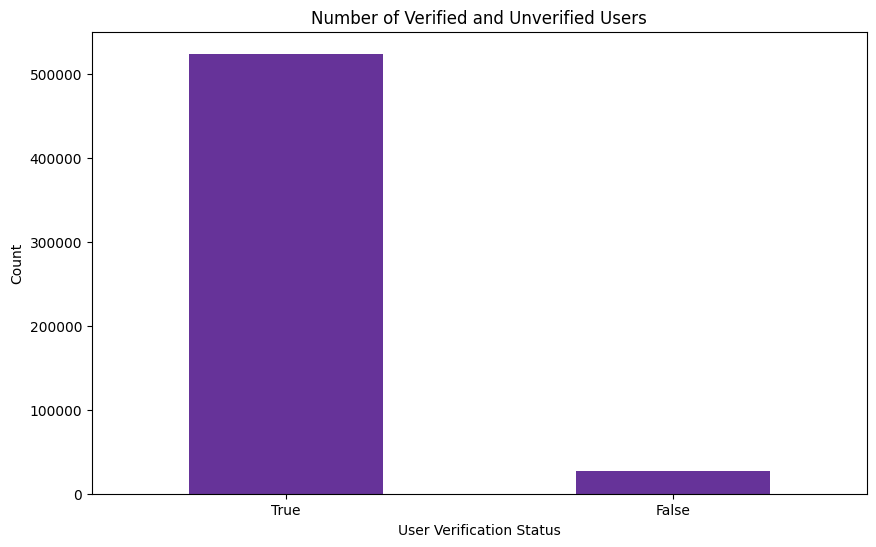

In [98]:
# Number of verified users
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['verified'].value_counts().plot(kind='bar', color='rebeccapurple')
plt.xlabel('User Verification Status')
plt.ylabel('Count')
plt.title('Number of Verified and Unverified Users')
plt.xticks(rotation=0)

## Proper Visualizations for Report

### Number of Observations per Category

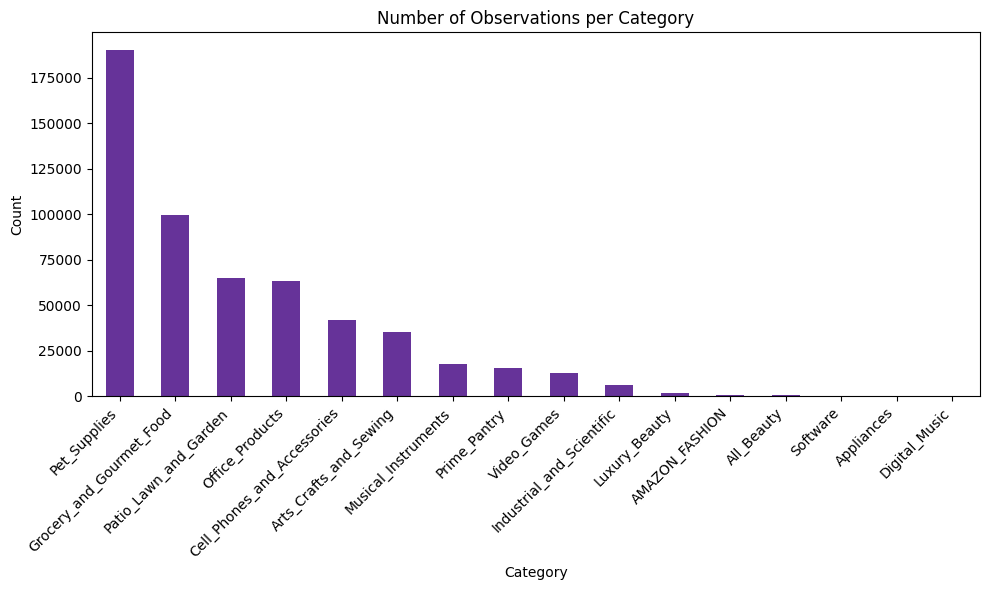

In [99]:
import numpy as np
import seaborn as sns

plt.figure(figsize=(10, 6))
df['category'].value_counts().plot(kind='bar', color='rebeccapurple')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Observations per Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Rating Distribution per Category

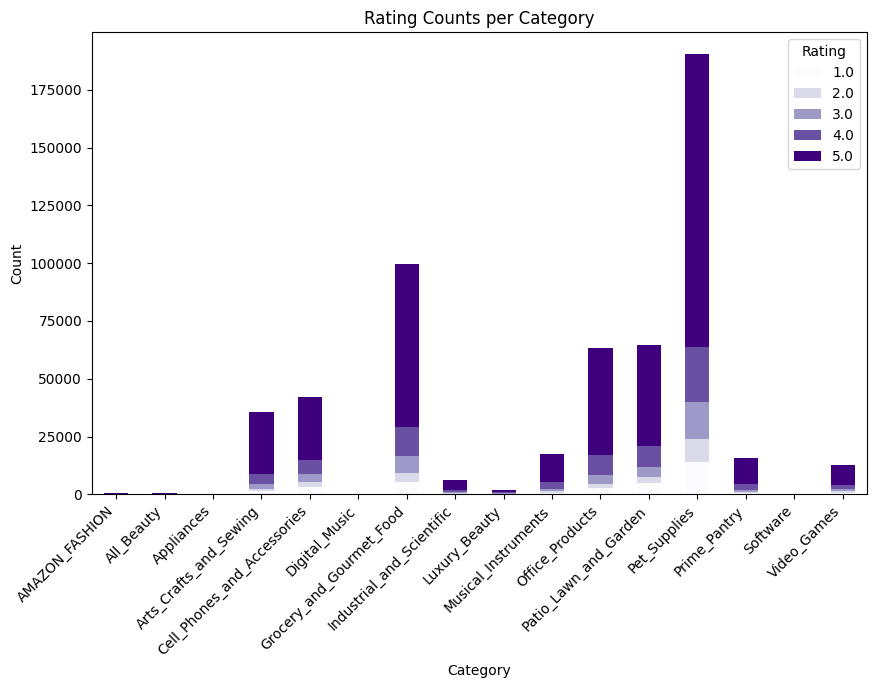

In [100]:
rating_counts = df.groupby('category')['rating'].value_counts().unstack().fillna(0)
rating_counts.plot(kind='bar', colormap='Purples', stacked=True, figsize=(10, 6))
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Rating Counts per Category')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rating')
plt.show()

### Distribution of Review Lengths by Category

/var/folders/h7/55jp1h_j29v3lqw361b7y3rc0000gn/T/ipykernel_17972/1510903817.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = 'Category')


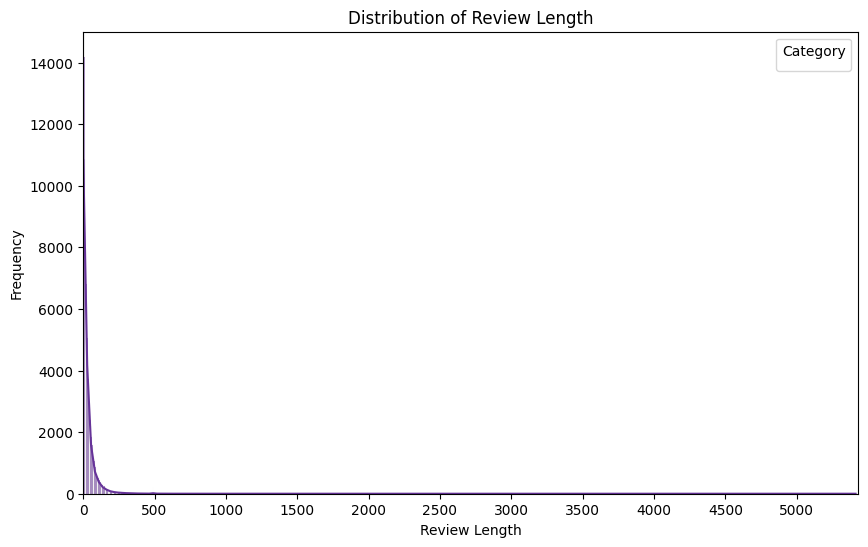

In [101]:
df['review_length'] = df['reviewText'].dropna().apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], color = 'rebeccapurple', kde=True)
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.ylim(0, 15000)
plt.xlim(0, 5430)
plt.xticks(range(0, 5431, 500))
plt.title('Distribution of Review Length')
plt.legend(title = 'Category')
plt.show()

### WordCount per Category (only top 5)

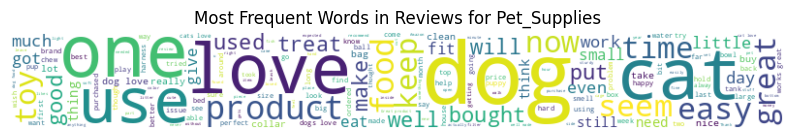

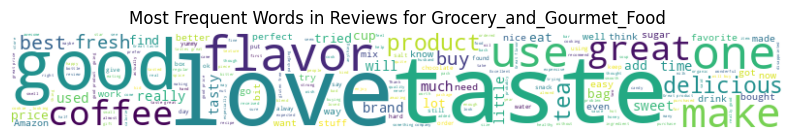

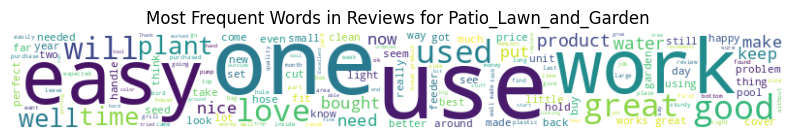

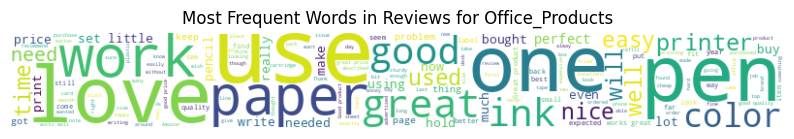

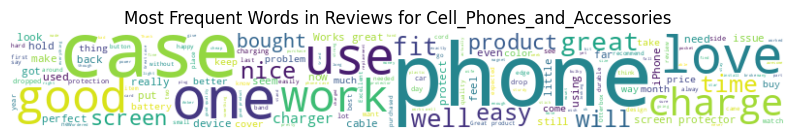

In [82]:
from wordcloud import WordCloud

top_categories = df['category'].value_counts().index[:5]
for category in top_categories:
    text = ' '.join(df[df['category'] == category]['reviewText'].dropna())
    wordcloud = WordCloud(width=800, height=100, background_color ='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Frequent Words in Reviews for {category}')
    plt.show()

### Number of Reviews over Time

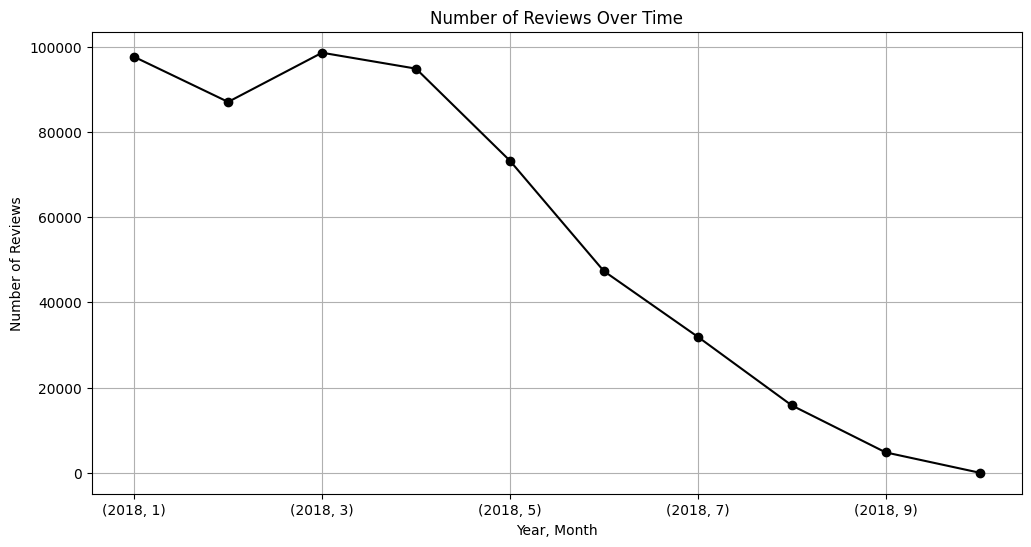

In [133]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'])
df['year'] = df['reviewTime'].dt.year
df['month'] = df['reviewTime'].dt.month
reviews_by_month = df.groupby(['year', 'month']).size()

plt.figure(figsize=(12, 6))
reviews_by_month.plot(kind='line', marker='o', color='black')
plt.title('Number of Reviews Over Time')
plt.xlabel('Year, Month')
plt.ylabel('Number of Reviews')
#plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Verified vs. Non-verified Users

(array([0, 1]), [Text(0, 0, 'True'), Text(1, 0, 'False')])

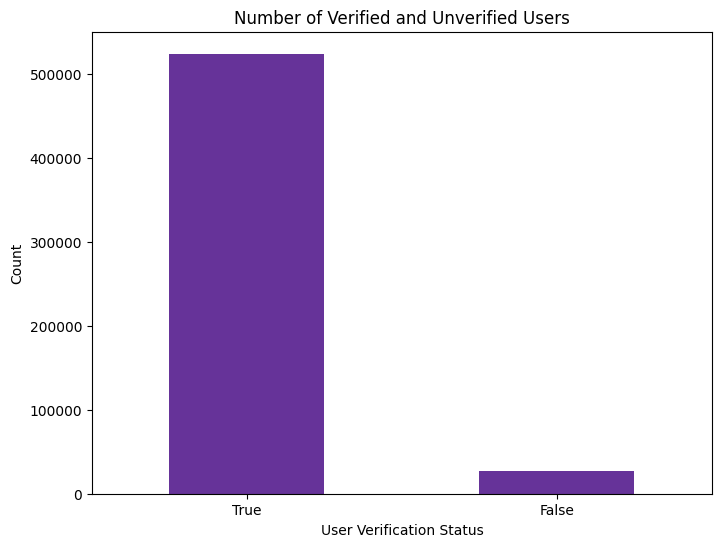

In [111]:
plt.figure(figsize=(8, 6))
df['verified'].value_counts().plot(kind='bar', color='rebeccapurple')
plt.xlabel('User Verification Status')
plt.ylabel('Count')
plt.title('Number of Verified and Unverified Users')
plt.xticks(rotation=0)

### Distribution of Ratings by Verified Status

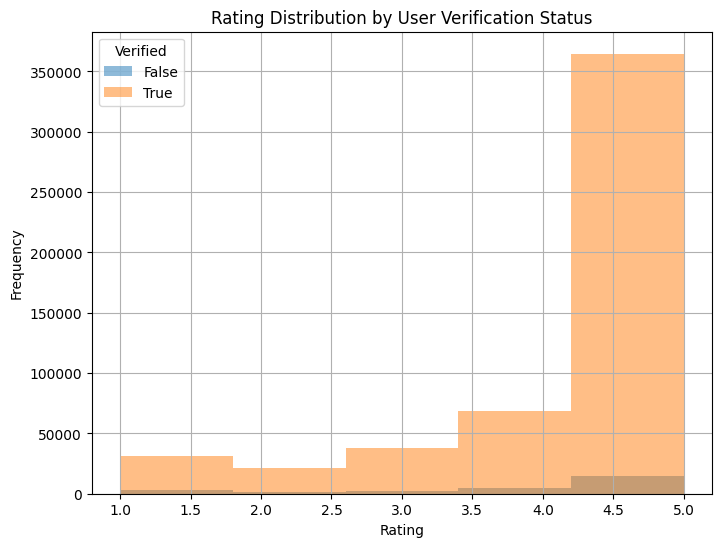

In [130]:
grouped_by_verified = df.groupby('verified')

plt.figure(figsize=(8, 6))
for verified_status, group in grouped_by_verified:
    plt.hist(group['rating'], alpha=0.5, label=str(verified_status), bins=5)

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution by User Verification Status')
plt.legend(title='Verified')
plt.grid(True)
plt.show()